# MCMC

## 拒绝采样

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = 10**4
mean = 1.4
sigma = 1.2
k = 3

In [3]:
z = np.random.normal(loc=mean, scale=sigma, size=size)
qz = 1/(np.sqrt(2*np.pi)*sigma**2) * np.exp(-0.5*(z-mean)**2 / sigma**2)

In [4]:
u = np.random.uniform(low=0, high=k*qz, size=size)

In [5]:
pz = 0.3*np.exp(-(z-0.3)**2) + 0.7*np.exp(-(z-2.)**2/0.3)

In [6]:
sample = z[u <= pz]

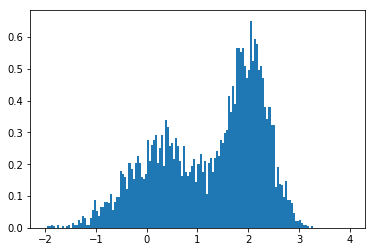

In [7]:
bins = plt.hist(sample, bins=150,density=True,range=(-2, 4))

## MCMC

In [8]:
def p(x):
    return 0.3*np.exp(-(x-0.3)**2) + 0.7*np.exp(-(x-2.)**2/0.3)

In [9]:
def q(y, x): # q(y|x)
#     return 1/(np.sqrt(2*np.pi)*1.2**2) * np.exp(-0.5*(y-1.4)**2/1.2**2)
    return 1/(5.-(-2.5))
def sample_q(x):
#     return np.random.normal(loc=1.4, scale=1.2)
    return np.random.uniform(low=-2.5, high=5.)

In [10]:
def mcmc(p, q, sample_q, size):
    res = []
    it = 0
    x = 0.
    ti = 0
    while it<size:
        y = sample_q(x)
        u = np.random.uniform(low=0, high=1)
        if u<=p(y)*q(x, y):
            x = y
            it += 1
            res.append(x)
        ti += 1
    return np.array(res), ti

In [11]:
x = np.linspace(-2, 4, 10000) 
y = p(x)

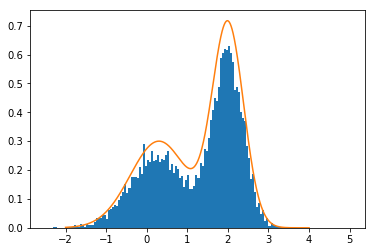

In [21]:
res, ti = mcmc(p, q, sample_q, 10**4)
bins = plt.hist(res[1000:], bins=150,density=True,range=(-2.5, 5))
plt.plot(x, y)

In [13]:
ti

460782

In [22]:
def Metropolis_Hastings(p, q, sample_q, size):
    res = []
    it = 0
    x = 0.
    ti = 0
    while it<size:
        y = sample_q(x)
        u = np.random.uniform(low=0, high=1)
        if u<=min(p(y)*q(x, y)/(p(x)*q(y, x)), 1):
            x = y
            it += 1
            res.append(x)
        ti += 1
    return np.array(res), ti

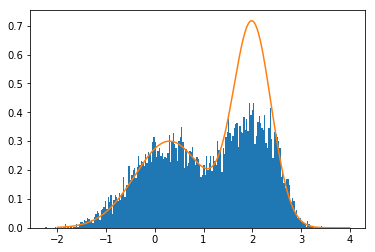

In [23]:
res, ti = Metropolis_Hastings(p, q, sample_q, 10**4)
bins = plt.hist(res[1000:], bins=200,density=True)
plt.plot(x, y)

In [16]:
ti

27244